In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
sample_n = 200
features_n = 2
iteration = 1000
cluster_n = 3
points = np.random.uniform(0,20,(sample_n, features_n))
samples = tf.constant(points)
initial_centroid = tf.slice(tf.random_shuffle(samples),[0,0], [cluster_n,-1])
x= samples[0]

Instructions for updating:
non-resource variables are not supported in the long term


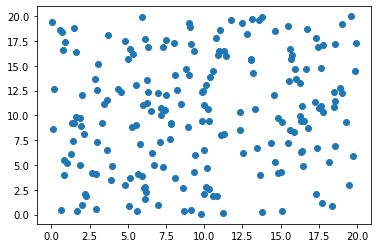

In [3]:
X = points[:,0]
Y = points[:,1]
plt.scatter(X,Y)
sess = tf.Session()

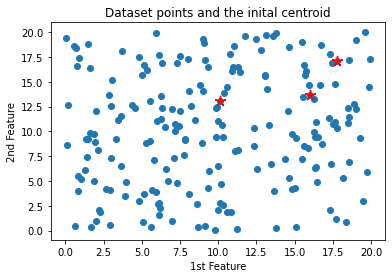

In [6]:
X = points[:,0]
Y = points[:,1]
plt.scatter(X,Y)
sess = tf.Session()
with sess.as_default():
    cent = initial_centroid.eval()
    X1 = cent[:,0]
    Y1 = cent[:,1]
    plt.scatter(X1,Y1, s=100, color='red', marker=(5,2))
    plt.xlabel('1st Feature')
    plt.ylabel('2nd Feature')
    plt.title('Dataset points and the inital centroid')
    plt.show()